<div style="display:block" direction=rtl align=right><br><br>
    <div  style="width:100%;margin:100;display:block"  display=block align=center>
        <img width=130 align=right src="https://i.ibb.co/yXKQmtZ/logo1.png" style="margin:0;" />
        <img width=170 align=left  src="https://i.ibb.co/wLjqFkw/logo2.png" style="margin:0;" />
        <span><br><font size=5>University of Tehran , school of ECE</font></span>
        <span><br><font size=3>Data Analytics Course</font></span>
        <span><br><font size=3>Fall 2022</font></span>
    </div><br><br><br>
    <div style="display:block" align=left display=block> 
        <font size=3>Homework 2</font><br>
        <hr />
        <font size=3>TA: <a href="mailto:mersad.esalati@gmail.com">Mersad Esalati</a><br></font><br>
    </div>
</div>

# Selenium

## Weather Info Crawler
Daily Weather Information:
- Temperature (°F) - only Avg metric
- Dew Point (°F) - only Avg metric
- Humidity (%) - only Avg metric
- Wind Speed (mph) - only Avg metric
- Pressure (in) - only Avg metric
- Precipitation (in) - only Avg metric
- date

In [ ]:
# crawl data + save into csv files

In [2]:
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException

from tqdm import tqdm

import pandas as pd

driver = webdriver.Chrome(executable_path='chromedriver')

In [80]:
 # For each month this loop will execute
for page in tqdm(range(12)):
    data = {
        'Temperature': [],
        'Dew Point': [],
        'Humidity': [],
        'Wind Speed': [],
        'Pressure': [],
        'Precipitation': [],
        'date': []
    }
    month = page + 1
    url = f"https://www.wunderground.com/history/monthly/us/va/arlington/KDCA/date/2021-{month}"
    driver.get(url)
    
#     Extract data
    
    # wait until the page loads
    WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.CSS_SELECTOR, 'table.days>tbody>tr>td')))
    
    #select columns of table
    elements = driver.find_elements(By.CSS_SELECTOR, 'table.days>tbody>tr>td')

    #first getting date
    for day in elements[0].find_elements(By.CSS_SELECTOR, 'table>tr')[1:]:
        data['date'].append(f'2021-{month}-{day.text}')
        
    index = 0 # this variable is for understanding that we are in which column
    for row in elements[1:]:
        for item in row.find_elements(By.CSS_SELECTOR, 'table>tr')[1:]:
             #converting to a list of float numbers
            temp = list(map(float, item.text.split())) 
            
            if index == 0:
                data['Temperature'].append(temp[1])
            elif index == 1:
                data['Dew Point'].append(temp[1])
            elif index == 2:
                data['Humidity'].append(temp[1])
            elif index == 3:
                data['Wind Speed'].append(temp[1])
            elif index == 4:
                data['Pressure'].append(temp[1])
            elif index == 5:
                data['Precipitation'].append(temp[0])
            
        index += 1
    
    # convert data to a dataframe and save into a csv file
    df = pd.DataFrame(data)
    df['date'] = pd.to_datetime(df['date'])
    df.drop_duplicates(subset=['date'], keep='first', inplace=True, ignore_index=True)
    df.to_csv(f'weather-2021-{month}.csv')

    time.sleep(5)

# Close 
driver.close()


100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [03:38<00:00, 18.18s/it]


## Download Capitalbikeshare Data
You can write script for download and extracting files or do it manualy.

In [7]:
# I did it manualy

## Question 1: Merge Weather Info Dataframes

In [3]:
dfw1 = pd.read_csv('weather-2021-1.csv')
dfw2 = pd.read_csv('weather-2021-2.csv')
dfw3 = pd.read_csv('weather-2021-3.csv')
dfw4 = pd.read_csv('weather-2021-4.csv')
dfw5 = pd.read_csv('weather-2021-5.csv')
dfw6 = pd.read_csv('weather-2021-6.csv')
dfw7 = pd.read_csv('weather-2021-7.csv')
dfw8 = pd.read_csv('weather-2021-8.csv')
dfw9 = pd.read_csv('weather-2021-9.csv')
dfw10 = pd.read_csv('weather-2021-10.csv')
dfw11 = pd.read_csv('weather-2021-11.csv')
dfw12 = pd.read_csv('weather-2021-12.csv')

In [4]:
dfw = pd.concat([dfw1, dfw2, dfw3, dfw4, dfw5, dfw6, dfw7, dfw8, dfw9, dfw10, dfw11, dfw12]).reset_index()

## Question 2: Merge Capitalbikeshare Dataframes

In [6]:
dfb1 = pd.read_csv('bike/202101-capitalbikeshare-tripdata.csv')
dfb2 = pd.read_csv('bike/202102-capitalbikeshare-tripdata.csv')
dfb3 = pd.read_csv('bike/202103-capitalbikeshare-tripdata.csv')
dfb4 = pd.read_csv('bike/202104-capitalbikeshare-tripdata.csv')
dfb5 = pd.read_csv('bike/202105-capitalbikeshare-tripdata.csv')
dfb6 = pd.read_csv('bike/202106-capitalbikeshare-tripdata.csv')
dfb7 = pd.read_csv('bike/202107-capitalbikeshare-tripdata.csv')
dfb8 = pd.read_csv('bike/202108-capitalbikeshare-tripdata.csv')
dfb9 = pd.read_csv('bike/202109-capitalbikeshare-tripdata.csv')
dfb10 = pd.read_csv('bike/202110-capitalbikeshare-tripdata.csv')
dfb11 = pd.read_csv('bike/202111-capitalbikeshare-tripdata.csv')
dfb12 = pd.read_csv('bike/202112-capitalbikeshare-tripdata.csv')

C:\Users\Rayan\AppData\Local\Temp\ipykernel_13788\3136643983.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  dfb2 = pd.read_csv('bike/202102-capitalbikeshare-tripdata.csv')


In [7]:
dfb = pd.concat([dfb1, dfb2, dfb3, dfb4, dfb5, dfb6, dfb7, dfb8, dfb9, dfb10, dfb11, dfb12]).reset_index()

## Question 3: Data Cleaning

In [8]:
#a
dfb = dfb.dropna()

In [9]:
#b

In [10]:
dfb['started_at'] = pd.to_datetime(dfb['started_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
dfb['ended_at'] = pd.to_datetime(dfb['ended_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
dfb = dfb.dropna()

In [11]:
#c
dfb = dfb.loc[(dfb['ended_at'] - dfb['started_at'] <= pd.Timedelta(days=1)).index]

## Question 4: Join Dataframes

For join these two dataframes, I need the date of each started_at column which type is datetime.

So I created a column that saves the date of this column. Then I made sure these two columns have datetime type. Then I joined the dataframes.

In [12]:
dfb['date'] = dfb['started_at'].dt.date
dfw['date'] = pd.to_datetime(dfw['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
dfb['date'] = pd.to_datetime(dfb['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

In [14]:
out = pd.merge(dfw, dfb, on='date')

## Question 5: Histograms

### Humidity

<AxesSubplot:>

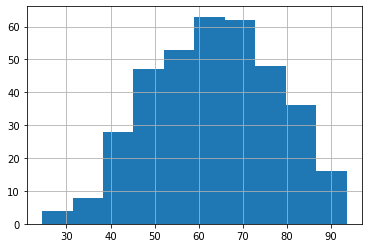

In [85]:
dfw['Humidity'].hist()

### Temperature

<AxesSubplot:>

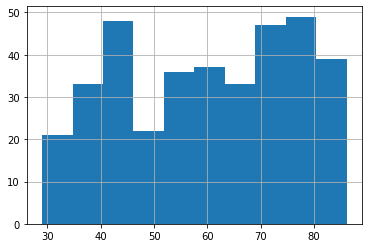

In [86]:
dfw['Temperature'].hist()

## Question 6: Line Plot

In [18]:
import matplotlib.pyplot as plt

In [19]:
g1 = dfb.groupby(by='date').count()
g1['count'] = g1['index']
g1 = g1['count']

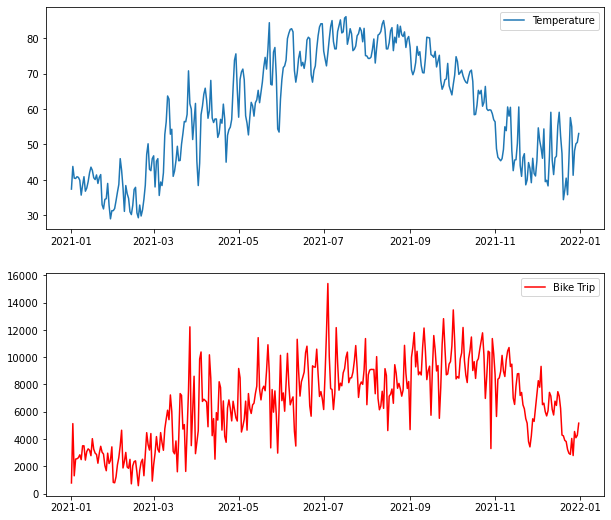

In [21]:
g = dfw[['date', 'Temperature']].set_index('date')
plt.figure(figsize=(10, 9))
plt.subplot(2,1,1)
plt.plot(g)
plt.legend(['Temperature'])

plt.subplot(2,1,2)
plt.plot(g1, 'r')

plt.legend(['Bike Trip'])